# EDA

This notebook uses a variety of exploritory data analysis tools to explore trends across census tracts in the Boston Area using data from the 2000 and 2010 censuses.

In [4]:
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
import folium
import branca.colormap as cm
from folium import IFrame
from folium.plugins import MarkerCluster
from folium.plugins import Search

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Long-form questionnaire

In [6]:
df = pd.read_csv('../Full_count_census_changes.csv',index_col=0)

In [7]:
len(df[df['POP00_PC']>10])

55

In [8]:
df['POP00'].describe()

count     203.000000
mean     3398.479311
std      1611.355730
min         0.000000
25%      2298.000031
50%      3285.000000
75%      4422.276133
max      7984.000000
Name: POP00, dtype: float64

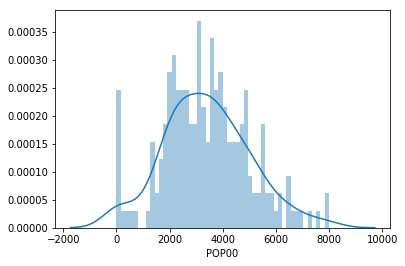

In [9]:
# lets check distribution of population sizes
sns.distplot(df['POP00'],bins=50)

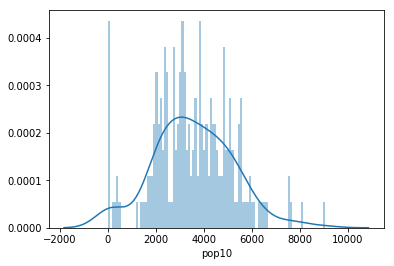

In [10]:
sns.distplot(df['pop10'],bins=100)

In [11]:
# lets drop tracts with less than 600 people, these are mostly comprised of parks and NAN values
df = df[df['POP00']>600]

In [12]:
# dropped these census tracts from sample set so drop here
df.drop(190,inplace=True)
df.drop(192,inplace=True)

In [13]:
# to handle inf and nan values, lets replace with 0
df.replace([-np.inf,np.inf],0,inplace=True)

In [14]:
df.fillna(0,inplace=True)

## Visuals

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

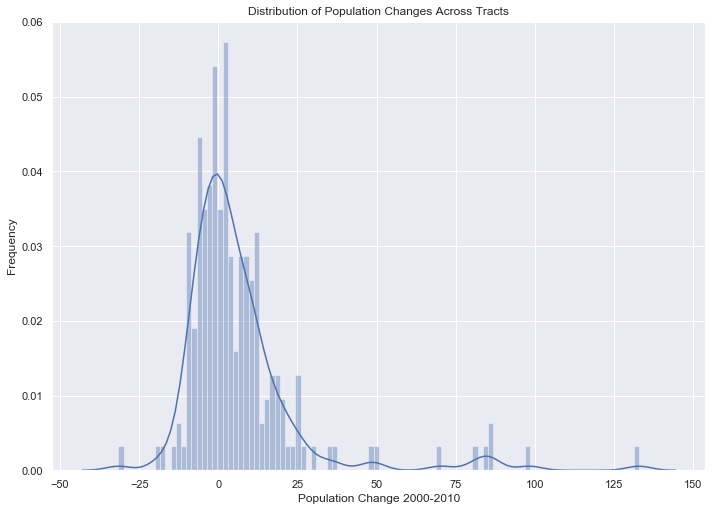

In [16]:
ax = sns.distplot(df['POP00_PC'],bins=100)

ax.set(xlabel='Population Change 2000-2010',ylabel='Frequency')
ax.set_title('Distribution of Population Changes Across Tracts')
plt.savefig('Population_change_dist.png', dpi=300)

In [24]:
len(df[df['POP00_PC']>5])

74

In [25]:
df['POP00_PC'].describe()

count    191.000000
mean       6.800703
std       20.144923
min      -31.556270
25%       -3.668234
50%        2.376600
75%       10.326085
max      132.961310
Name: POP00_PC, dtype: float64

In [20]:
112/190

0.5894736842105263

Text(0.5, 1.0, 'Tracts with Largest Population Declines')

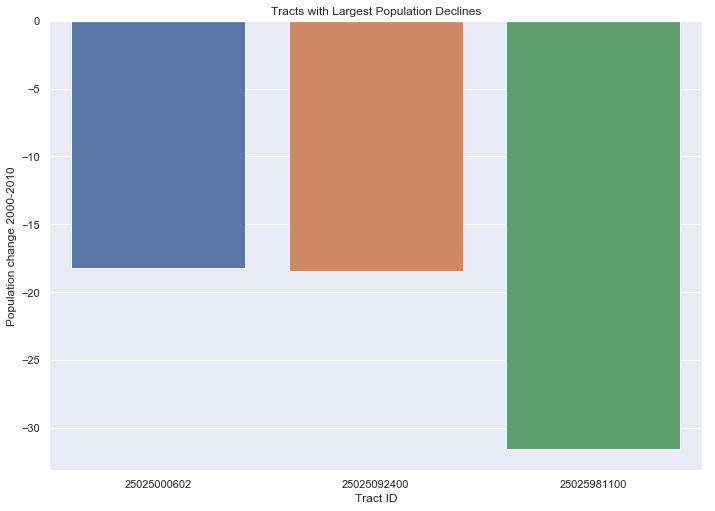

In [600]:
ax = sns.barplot(y='POP00_PC',x='tractid',data=df[df['POP00_PC']<-15])

ax.set(xlabel='Tract ID',ylabel='Population change 2000-2010')
ax.set_title('Tracts with Largest Population Declines')
# plt.savefig('Population_change_negative.png', dpi=300)

Text(0.5, 1.0, 'Tracts with Largest Population Increases')

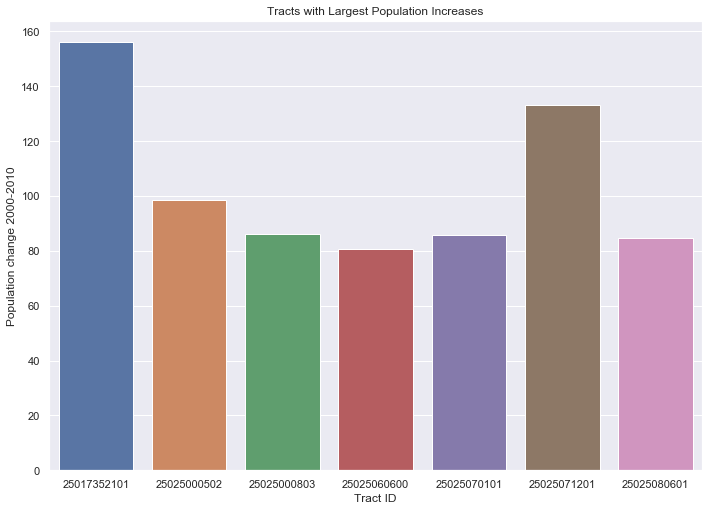

In [601]:
ax = sns.barplot(y='POP00_PC',x='tractid',data=df[df['POP00_PC']>80])

ax.set(xlabel='Tract ID',ylabel='Population change 2000-2010')
ax.set_title('Tracts with Largest Population Increases')
# plt.savefig('Population_change_positive.png', dpi=500)

Text(0.5, 1.0, 'Distribution of Population Changes (2000-2010) by Race')

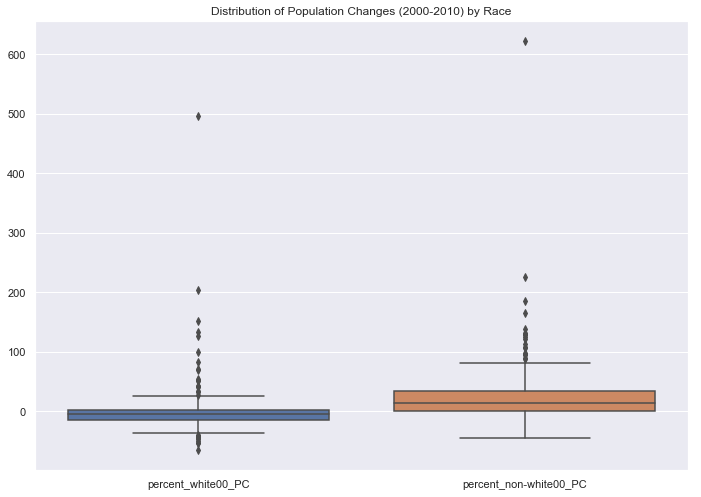

In [602]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=df[['percent_white00_PC','percent_non-white00_PC']])

ax.set_title('Change in White and Non-white Population Changes (2000-2010) by Race')
# plt.savefig('Race_pop_changes.png', dpi=300)

In [568]:
df.head()

,tractid,state_x,county_x,tract_x,POP00,percent_white00,percent_black00,percent_asian00,percent_hispanic00,percent_indian00,percent_chinese00,percent_filip00,percent_japan00,percent_korean00,percent_viet00,percent_mex00,percent_pr00,percent_cuban00,percent_vacant_housing00,percent_occupied_housing00,percent_under18_00,percent_60andup_00,percent_75andup_00,percent_owneroccupied_00,percent_renteroccupied_00,percent_non-white00,pop10,percent_white10,percent_black10,percent_asian10,percent_hispanic10,percent_indian10,percent_chinese10,percent_filip10,percent_japan10,percent_korean10,percent_viet10,percent_mex10,percent_pr10,percent_cuban10,percent_vacant_housing10,percent_occupied_housing10,percent_under18_10,percent_60andup_10,percent_75andup_10,percent_owneroccupied_10,percent_renteroccupied_10,non-white10,POP00_PC,percent_white00_PC,percent_black00_PC,percent_asian00_PC,percent_hispanic00_PC,percent_indian00_PC,percent_chinese00_PC,percent_filip00_PC,percent_japan00_PC,percent_korean00_PC,percent_viet00_PC,percent_mex00_PC,percent_pr00_PC,percent_cuban00_PC,percent_vacant_housing00_PC,percent_occupied_housing00_PC,percent_under18_00_PC,percent_60andup_00_PC,percent_75andup_00_PC,percent_owneroccupied_00_PC,percent_renteroccupied_00_PC,percent_non-white00_PC
0,25025000100,MA,Suffolk County,Census Tract 1,3968.000000,70.816532,4.989919,10.937500,8.795363,1.008065,6.174395,0.302419,0.302419,0.378024,2.469758,0.579637,0.982863,0.151210,3.159851,96.840149,13.734879,13.785282,5.317540,27.323420,69.516729,37.626008,4254,58.956276,6.770099,12.317819,14.598025,0.893277,6.676070,0.376117,0.423131,0.893277,1.151857,1.034321,2.139163,0.258580,5.330990,94.669010,13.610719,11.307005,4.278326,23.901582,70.767428,47.907851,7.207661,-16.747863,35.675514,12.620055,65.974111,-11.386930,8.125078,24.369221,39.915374,136.301520,-53.361542,78.442796,117.646137,71.007679,68.710155,-2.241982,-0.903974,-17.977703,-19.543134,-12.523463,1.799135,27.326426
1,25025000201,MA,Suffolk County,Census Tract 2.01,3887.000000,77.617700,3.524569,8.978647,7.435040,0.848984,5.737072,0.668896,0.282995,0.360175,0.463082,0.643170,0.874711,0.643170,1.969504,98.030496,11.577052,10.959609,4.296373,29.415502,68.614994,30.743504,3854,70.783601,7.135444,9.133368,10.560457,1.089777,5.137519,0.570835,0.389206,0.570835,0.363259,0.467047,1.349248,0.596783,4.758962,95.241038,11.390763,9.937727,3.554748,27.626700,67.614339,37.701090,-0.848984,-8.804820,102.448684,1.723212,42.036315,28.362504,-10.450502,-14.660093,37.531254,58.488398,-21.556247,-27.383498,54.250740,-7.212247,141.632441,-2.845499,-1.609122,-9.324073,-17.261637,-6.081155,-1.458362,22.631076
2,25025000202,MA,Suffolk County,Census Tract 2.02,3925.000000,64.280255,7.617834,15.439490,11.261146,1.146497,9.605096,0.101911,0.178344,0.560510,2.726115,0.484076,3.312102,0.382166,1.451187,98.548813,19.031847,13.910828,4.713376,33.707124,64.841689,53.070064,3885,61.003861,7.438867,14.131274,15.341055,1.081081,8.906049,0.334620,0.102960,0.463320,1.776062,0.592021,3.140283,0.489060,2.759527,97.240473,16.885457,12.303732,4.607465,31.143233,66.097240,54.208494,-1.019108,-5.097045,-2.349315,-8.473183,36.229960,-5.705706,-7.277873,228.346203,-42.268799,-17.339417,-34.850070,22.298991,-5.187605,27.970828,90.156493,-1.327606,-11.277887,-11.552840,-2.247035,-7.606378,1.936334,2.145146
3,25025000301,MA,Suffolk County,Census Tract 3.01,2923.000000,80.841601,3.386931,8.039685,5.542251,0.650017,4.618543,0.205269,0.102634,0.855286,0.273691,0.615806,0.581594,0.205269,2.931323,97.068677,12.076634,18.268902,8.279165,37.269682,59.798995,25.145399,2740,74.817518,5.875912,11.204380,6.934307,1.350365,7.737226,0.328467,0.218978,0.875912,0.255474,0.474453,0.948905,0.255474,4.922067,95.077933,9.963504,15.255474,6.167883,39.048400,56.029532,36.605839,-6.260691,-7.451711,73.487798,39.363410,25.117149,107.742989,67.525277,60.018248,113.357664,2.411679,-6.656022,-22.954177,63.155861,24.458637,67.912809,-2.050861,-17.497674,-16.494847,-25.501146,4.772562,-6.3

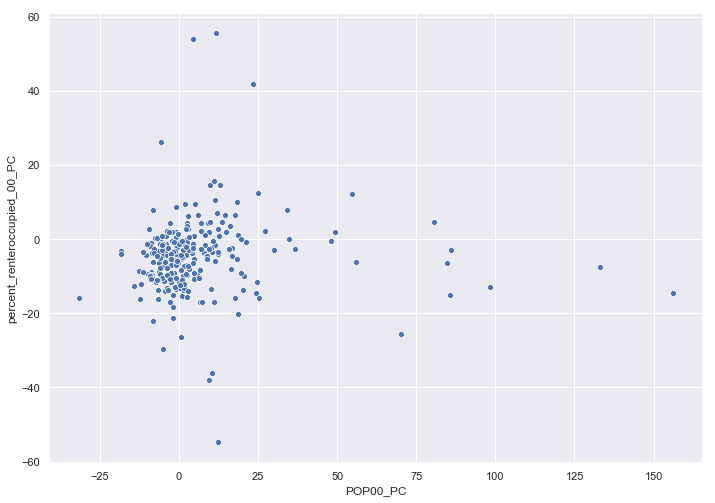

In [573]:
# change in population plotted against change in percentage of people who are white
sns.scatterplot(x='POP00_PC',y='percent_renteroccupied_00_PC',data=df)

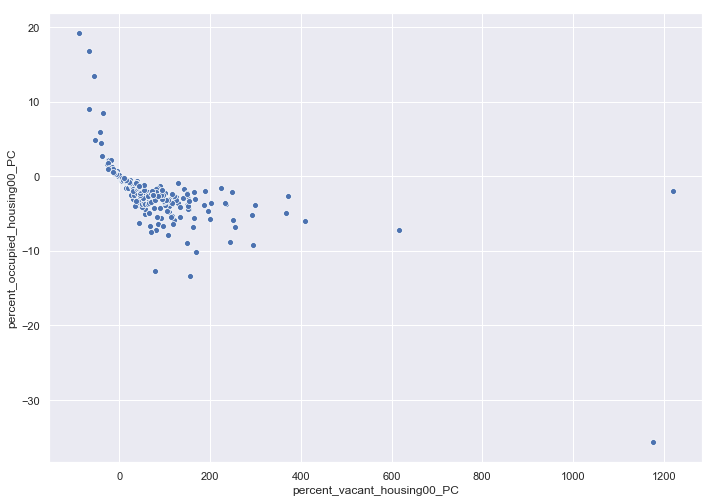

In [572]:
#
sns.scatterplot(x='percent_vacant_housing00_PC',y='percent_occupied_housing00_PC',data=df)

# Sample Count

In [753]:
df2 =  pd.read_csv('CSV_files/Sample_count_census_changes.csv',index_col=0)

In [754]:
# let's drop same tracts that we dropped from full count df

tracts_to_remove = [25025981201,25025980300,25025981000,25025981202,25025981300,25025981501,25025981502,
                    25025981600,25025981700,25025981800]

df2 = df2[df2['tractid'].isin(tracts_to_remove) == False]

In [755]:
df2.iloc[[191]]

,tractid,INCPC00,HINC00,MHMVAL00,MRENT00,percent_foreign_born,percent_naturalized,percent_recent_immigrants(10),percent_other_languages,percent_hs_degree_orless,percent_4yrcollege_degree_ormore,percent_married,percent_unemployed,percent_employed,percent_professional,percent_manufacturing,percent_self_employed,percent_poverty,percent_houses_30yrsago,percent_multiunit_houses,incpc12,hinc12,mhmval12,mrent12,pfb12,pnat12,p10imm12,polang12,phs12,pcol12,pmar12,punemp12,percent_employed12,pprof12,pmanuf12,psemp12,ppov12,p30old12,pmulti12,INCPC00_PC,HINC00_PC,MHMVAL00_PC,MRENT00_PC,percent_foreign_born_PC,percent_naturalized_PC,percent_recent_immigrants(10)_PC,percent_other_languages_PC,percent_hs_degree_orless_PC,percent_4yrcollege_degree_ormore_PC,percent_married_PC,percent_unemployed_PC,percent_employed_PC,percent_professional_PC,percent_manufacturing_PC,percent_self_employed_PC,percent_poverty_PC,percent_houses_30yrsago_PC,percent_multiunit_houses_PC
192,25025980700,22760.688736,44971.72913,217604.081392,750.767743,24.929048,12.416476,10.331807,35.678891,49.868505,23.314931,44.253111,3.267492,96.732506,34.692661,5.601727,5.297363,16.422506,76.549146,51.742068,-999,-999,1000001,-999,0.0,0.0,0.0,100.0,0.0,100.0,100.0,-999.0,NaN,-999.0,-999.0,-999.0,0.0,100.0,100.0,-104.389147,-102.221396,359.550664,-233.063788,-100.0,-100.0,-100.0,180.277771,-100.0,328.9097,125.972815,-30673.909643,NaN,-2979.571573,-17933.786003,-18958.441166,-100.0,30.63503,93.266338


In [756]:
# and this is a bunch of island off the coast of boston - lots of NANS 
df2.drop(190,axis=0,inplace=True)

In [757]:
# also this tract is a golf course and has a bunch of NAN values so lets drop
df2.drop(192,axis=0,inplace=True)

In [758]:
# to handle inf and nan values, lets replace with 0
df2.replace([-np.inf,np.inf],0,inplace=True)

In [759]:
df2[df2['tractid']==25025060700]

,tractid,INCPC00,HINC00,MHMVAL00,MRENT00,percent_foreign_born,percent_naturalized,percent_recent_immigrants(10),percent_other_languages,percent_hs_degree_orless,percent_4yrcollege_degree_ormore,percent_married,percent_unemployed,percent_employed,percent_professional,percent_manufacturing,percent_self_employed,percent_poverty,percent_houses_30yrsago,percent_multiunit_houses,incpc12,hinc12,mhmval12,mrent12,pfb12,pnat12,p10imm12,polang12,phs12,pcol12,pmar12,punemp12,percent_employed12,pprof12,pmanuf12,psemp12,ppov12,p30old12,pmulti12,INCPC00_PC,HINC00_PC,MHMVAL00_PC,MRENT00_PC,percent_foreign_born_PC,percent_naturalized_PC,percent_recent_immigrants(10)_PC,percent_other_languages_PC,percent_hs_degree_orless_PC,percent_4yrcollege_degree_ormore_PC,percent_married_PC,percent_unemployed_PC,percent_employed_PC,percent_professional_PC,percent_manufacturing_PC,percent_self_employed_PC,percent_poverty_PC,percent_houses_30yrsago_PC,percent_multiunit_houses_PC
65,25025060700,9363.195488,20894.235867,387.748782,322.910441,27.219596,8.749176,10.17496,42.846611,87.483772,3.287253,22.946295,9.999931,90.000069,7.235585,6.976747,5.426358,46.662118,90.419118,98.203412,10089,19481,-999,434,32.959999,16.5,14.95,62.560001,82.709999,4.63,25.08,11.55,88.564761,4.74,4.35,0.0,30.360001,50.279999,85.669998,7.751675,-6.76376,-357.641042,34.402591,21.089227,88.589179,46.929316,46.009219,-5.456752,40.847073,9.298691,15.500799,-1.594786,-34.490438,-37.650026,-100.0,-34.936514,-44.392293,-12.762707


## Statistics

In [679]:
df2.head()

,tractid,INCPC00,HINC00,MHMVAL00,MRENT00,percent_foreign_born,percent_naturalized,percent_recent_immigrants(10),percent_other_languages,percent_hs_degree_orless,percent_4yrcollege_degree_ormore,percent_married,percent_unemployed,percent_employed,percent_professional,percent_manufacturing,percent_self_employed,percent_poverty,percent_houses_30yrsago,percent_multiunit_houses,incpc12,hinc12,mhmval12,mrent12,pfb12,pnat12,p10imm12,polang12,phs12,pcol12,pmar12,punemp12,percent_employed12,pprof12,pmanuf12,psemp12,ppov12,p30old12,pmulti12,INCPC00_PC,HINC00_PC,MHMVAL00_PC,MRENT00_PC,percent_foreign_born_PC,percent_naturalized_PC,percent_recent_immigrants(10)_PC,percent_other_languages_PC,percent_hs_degree_orless_PC,percent_4yrcollege_degree_ormore_PC,percent_married_PC,percent_unemployed_PC,percent_employed_PC,percent_professional_PC,percent_manufacturing_PC,percent_self_employed_PC,percent_poverty_PC,percent_houses_30yrsago_PC,percent_multiunit_houses_PC
0,25025000100,21999.00000,56514.969000,222100.0000,898.000000,26.033266,11.265121,10.509073,34.381663,43.822674,40.988372,32.633698,4.170074,95.829926,41.894198,5.588737,11.348123,13.463986,81.412639,85.439901,27564,53571,348200,1348,29.030001,15.30,9.48,38.450001,54.939999,30.780001,27.690001,6.06,94.380531,22.500000,7.83,7.13,14.660000,94.529999,78.639999,25.296604,-5.209184,56.776227,50.111359,11.511174,35.817451,-9.792235,11.832870,25.368886,-24.905530,-15.149056,45.321175,-1.512466,-46.293279,40.103205,-37.170225,8.883061,16.112190,-7.958695
1,25025000201,27675.00000,78896.821500,265600.0000,991.000000,25.752508,11.757139,11.474145,26.682565,29.159148,47.347528,29.920590,1.925134,98.074866,49.109415,8.106143,6.288622,8.696774,92.630241,80.813215,38128,65506,532000,1405,25.129999,14.55,7.07,29.030001,32.290001,53.320000,27.059999,1.89,98.404032,45.750000,5.98,8.02,10.130000,95.980003,83.279999,37.770551,-16.972574,100.301205,41.775984,-2.417276,23.754597,-38.383205,8.797639,10.737119,12.614115,-9.560608,-1.825001,0.335627,-6.840674,-26.228789,27.531915,16.479972,3.616272,3.052451
2,25025000202,23602.00000,71929.638900,276700.0000,820.000000,33.248408,15.312102,14.394904,36.802373,43.316100,38.810931,39.981813,2.715725,97.284275,47.996398,7.744259,5.718145,12.193878,96.503958,79.947230,29292,54607,432800,1299,36.240002,17.66,12.23,41.509998,32.820000,43.119999,33.090000,9.60,91.285081,45.950001,1.62,8.85,18.200001,96.260002,78.570000,24.108126,-24.082755,56.414890,58.414634,8.997706,15.333610,-15.039384,12.791636,-24.231407,11.102718,-17.237369,253.496788,-6.166663,-4.263648,-79.081279,54.770479,49.255236,-0.252793,-1.722674
3,25025000301,24920.00000,71319.282300,214400.0000,971.000000,24.391105,12.213202,11.436640,21.726079,36.535797,44.618938,33.253205,1.617735,98.382265,53.349574,3.958587,7.003654,8.985399,86.307420,79.063604,41955,89688,409700,1469,15.200000,6.10,6.10,19.830000,26.520000,61.369999,34.970001,4.36,97.350649,63.820000,5.92,7.74,8.990000,93.970001,76.589996,68.358748,25.755612,91.091418,51.287333,-37.682200,-50.054047,-46.662655,-8.727202,-27.413652,37.542492,5.162799,169.512601,-1.048579,19.626072,49.548310,10.513736,0.051206,8.878241,-3.128630
4,25025000302,35207.00128,81992.924658,259499.9961,1240.999993,25.428194,16.633729,7.312253,21.293800,25.886993,57.424443,33.655568,3.502130,96.497870,59.097599,9.612556,5.738107,5.566535,79.821962,81.379821,35219,69438,322200,1436,34.490002,13.92,17.90,42.180000,31.459999,56.759998,33.619999,3.02,97.389969,56.020000,5.47,2.68,16.740000,94.820000,75.019997,0.034080,-15.312205,24.161852,15.713135,35.636849,-16.314614,144.794584,98.085829,21.528211,-1.157077,-0.105685,-13.766754,0.924476,-5.207653,-43.095260,-53.294700,200.725668,18.789363,-7.814990


## Visuals

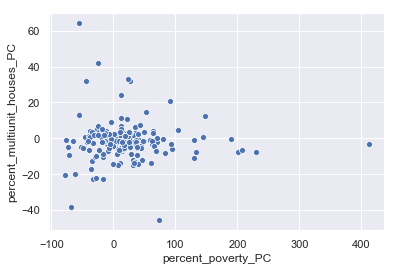

In [680]:
ax=sns.scatterplot(x='percent_poverty_PC',y='percent_multiunit_houses_PC',data=df2)


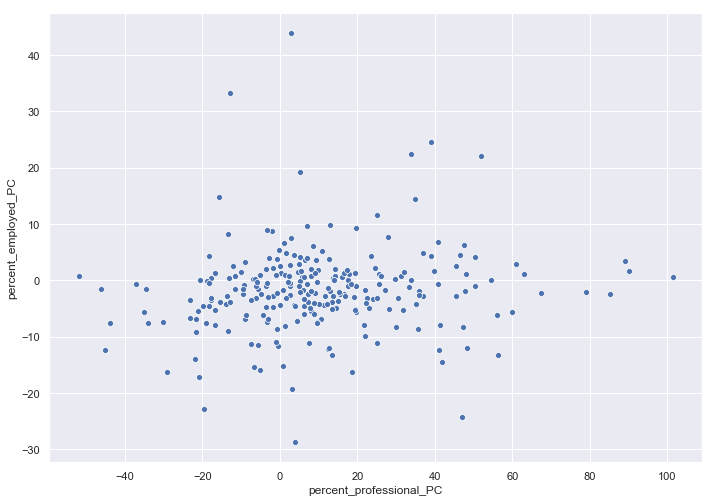

In [583]:
ax=sns.scatterplot(x='percent_professional_PC',y='percent_employed_PC',data=df2)


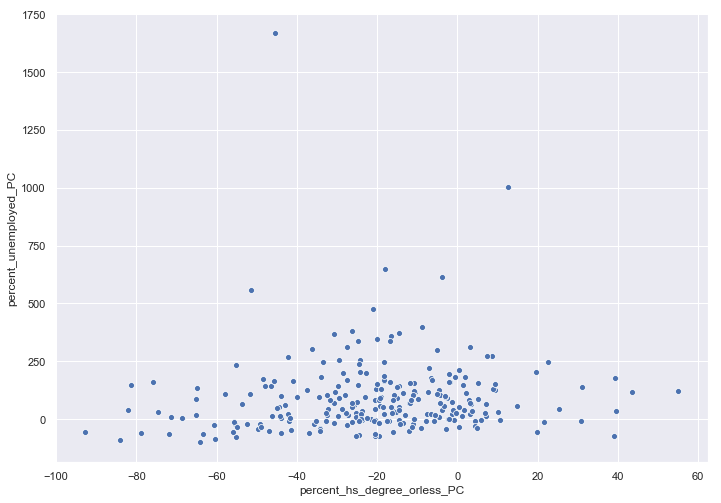

In [580]:
ax=sns.scatterplot(x='percent_hs_degree_orless_PC',y='percent_unemployed_PC',data=df2)
# ax.set(xlabel='Change in Number of Unemployed People',ylabel='Change in Number of Professional Employees')
# ax.set_title('Change in Number of Unemployed vs. Change in Number of Professional Employees (2000-2010)')
# plt.savefig('Unemployed v. Professional.png',dpi=300)

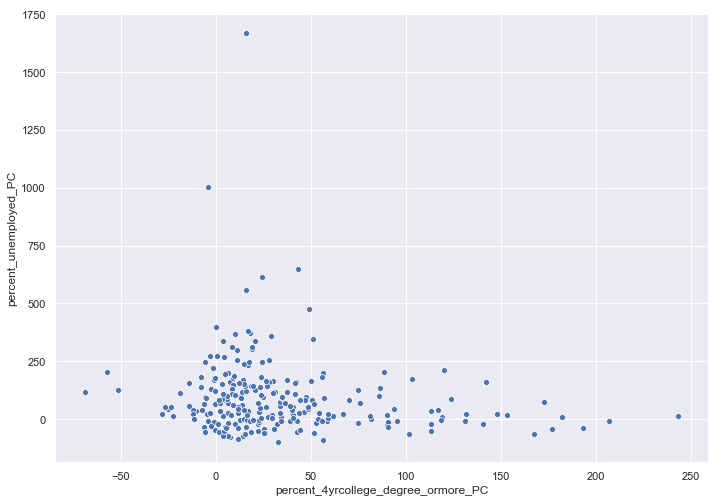

In [582]:
ax=sns.scatterplot(x='percent_4yrcollege_degree_ormore_PC',y='percent_unemployed_PC',data=df2)


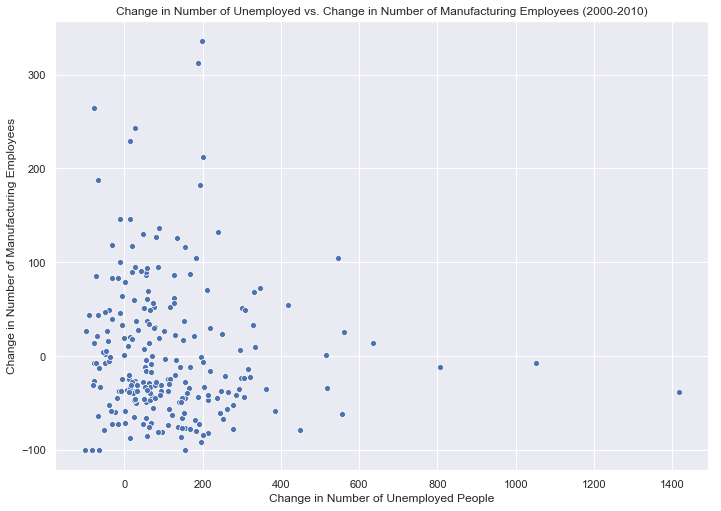

In [262]:
ax=sns.scatterplot(x='UNEMP00_PC',y='MANUF00_PC',data=df2)
ax.set(xlabel='Change in Number of Unemployed People',ylabel='Change in Number of Manufacturing Employees')
ax.set_title('Change in Number of Unemployed vs. Change in Number of Manufacturing Employees (2000-2010)')
plt.savefig('Unemployed v. Manufacturing.png',dpi=300)

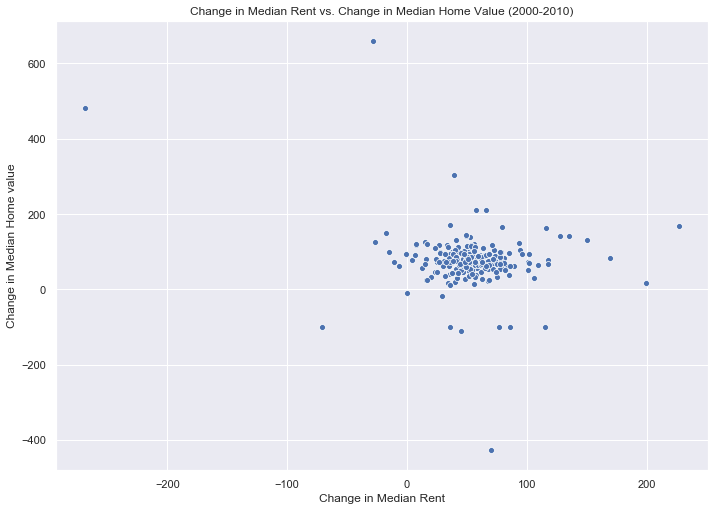

In [263]:
ax = sns.scatterplot(x='MRENT00_PC',y='MHMVAL00_PC',data=df2)
ax.set(xlabel='Change in Median Rent',ylabel='Change in Median Home value')
ax.set_title('Change in Median Rent vs. Change in Median Home Value (2000-2010)')
plt.savefig('Scatter_homevrent.png',dpi=300)

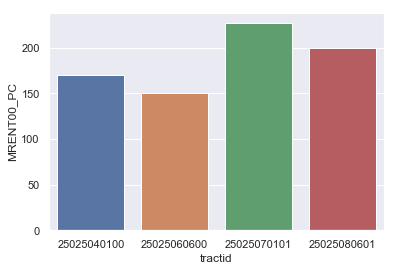

In [681]:
# median rent value
sns.barplot(y='MRENT00_PC',x='tractid',data=df2[df2['MRENT00_PC']>150])

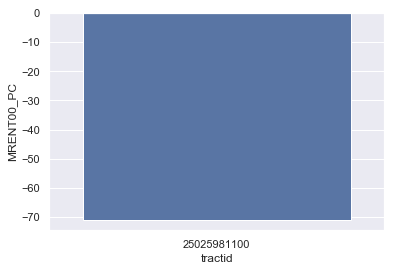

In [682]:
sns.barplot(y='MRENT00_PC',x='tractid',data=df2[df2['MRENT00_PC']<-50])

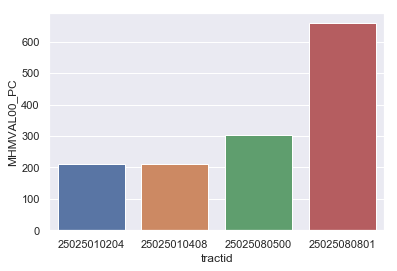

In [683]:
# median house value
sns.barplot(y='MHMVAL00_PC',x='tractid',data=df2[df2['MHMVAL00_PC']>200])

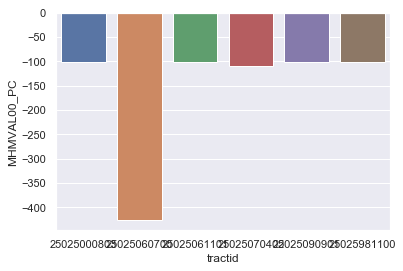

In [684]:
sns.barplot(y='MHMVAL00_PC',x='tractid',data=df2[df2['MHMVAL00_PC']<-25])

In [686]:
## save final dfs for clustering

In [751]:
df.to_csv('CSV_files/fullcount_final.csv')

In [760]:
df2.to_csv('CSV_files/samplecount_final.csv')

## Map Visuals

In [20]:
# shapefile downloadeded from census.gov
shapefile = gpd.read_file("../tl_2010_25025_tract10/tl_2010_25025_tract10.shp")
df_geo = gpd.GeoDataFrame(shapefile)
df_geo['id']=df_geo['STATEFP10']+df_geo['COUNTYFP10']+df_geo['TRACTCE10']
df_geo = df_geo[['geometry','id']]

In [21]:
df_geo.head()

,geometry,id
0,"POLYGON ((-71.09009 42.34666, -71.09000 42.346...",25025010405
1,"POLYGON ((-71.09066 42.33977, -71.09103 42.339...",25025010404
2,"POLYGON ((-71.08159 42.35370, -71.08044 42.354...",25025010801
3,"POLYGON ((-71.07066 42.35185, -71.07045 42.351...",25025010702
4,"POLYGON ((-71.10683 42.34875, -71.10520 42.348...",25025010204


In [22]:
## Visualizing clusters

In [23]:
df_data = pd.read_csv('fullcount_final.csv',index_col=0)
df_data2=pd.read_csv('samplecount_final.csv',index_col=0)

FileNotFoundError: [Errno 2] File b'fullcount_final.csv' does not exist: b'fullcount_final.csv'

In [7]:
cluster_map = pd.read_csv('../clusters.csv',index_col=0)

In [9]:
cluster_map.head()

,tractid,cluster,HINC00_PC,MHMVAL00_PC,MRENT00_PC,percent_owneroccupied_00_PC,percent_non-white00_PC,percent_4yrcollege_degree_ormore_PC,cluster_name
0,25025000100,1,-5.21,56.78,50.11,-12.52,27.33,-24.91,Becoming more affordable
1,25025000201,1,-16.97,100.30,41.78,-6.08,22.63,12.61,Becoming more affordable
2,25025000202,1,-24.08,56.41,58.41,-7.61,2.15,11.10,Becoming more affordable
3,25025000301,2,25.76,91.09,51.29,4.77,45.58,37.54,Remaining costly
4,25025000302,1,-15.31,24.16,15.71,-3.60,32.15,-1.16,Becoming more affordable


In [11]:
# cluster_map = pd.read_csv('CSV_files/clusters.csv',index_col=0)
# cluster_map['id']=cluster_map['tractid']
cluster_map['id']=cluster_map['tractid'].astype('str')
cluster_map=cluster_map[['id','cluster','cluster_name']]
# df_tovisualize = df_geo.merge(cluster_map, on='id',how='inner')

In [12]:
cluster_map['cluster'].value_counts()

2    82
1    77
0    31
Name: cluster, dtype: int64

In [13]:
cluster_map.head()

,id,cluster,cluster_name
0,25025000100,1,Becoming more affordable
1,25025000201,1,Becoming more affordable
2,25025000202,1,Becoming more affordable
3,25025000301,2,Remaining costly
4,25025000302,1,Becoming more affordable


In [14]:
def func(x):
    if x == 0:
        return 'Gentrifying'
    elif x==1:
        return 'Lagging behind'
    else:
        return 'Representing the average'

In [16]:
cluster_map['cluster_name']=cluster_map['cluster'].apply(func)

In [24]:
df_tovisualize = df_geo.merge(cluster_map, on='id',how='inner')

In [29]:
mapobj = folium.Map(location=[42.3601, -71.0589],zoom_start=13,tiles='Stamen Terrain')
style_function = lambda x: {'fillColor': '#0F81E7' if
                                 x['properties']['cluster']==0 else 
                                 '#88d5a7' if x['properties']['cluster']==1 else '#8891d5',
                           'weight':2,
                           'fillOpacity':0.8,'color': 'black'}

tractgeo=folium.features.GeoJson(data= df_tovisualize.to_json(),
                        name='Clusters',style_function=style_function,
                        tooltip=folium.GeoJsonTooltip(fields=['id','cluster_name'],
                                                     aliases=['Tract','Cluster'],
                                                     localize=True)).add_to(mapobj)
tractsearch = Search(
    layer=tractgeo,
    geom_type='Polygon',
    placeholder='Search for a census tract',
    collapsed=False,
    search_label='id'
).add_to(mapobj)

In [30]:
def embed_map(m,number):
    from IPython.display import IFrame

    m.save(f'index{number}.html')
    return IFrame(f'index{number}.html', width='100%', height='750px')

In [31]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#0F81E7;opacity:0.7;'></span>Gentrifying</li>
    <li><span style='background:#88d5a7;opacity:0.7;'></span>Lagging behind</li>
    <li><span style='background:#8891d5;opacity:0.7;'></span>Representing the average</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

mapobj.get_root().add_child(macro)

embed_map(mapobj,4)